In [ ]:
# prompt: lee el archivo data.csv como una tabla de pandas y muestra el resultado.

import pandas as pd

df = pd.read_csv("content/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  
0        12

In [ ]:
# prompt: cambia el tipo de columna de Invoice date a fecha y dime la fecha inicial y final del dataset

import pandas as pd
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get the minimum and maximum dates from the 'InvoiceDate' column
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

# Print the minimum and maximum dates
print("Fecha inicial:", min_date)
print("Fecha final:", max_date)


Fecha inicial: 2010-12-01 08:26:00
Fecha final: 2011-12-09 12:50:00


In [ ]:
# prompt: sobre este dataset dime cuales son sus columnas
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
df['Amount']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# prompt: Agrupa por CustomerId, InvoiceNo, InvoiceDate ,  y suma Amount

df_grouped = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])['Amount'].sum().reset_index()
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,Amount
0,12346,541431,2011-01-18 10:01:00,77183.60
1,12346,C541433,2011-01-18 10:17:00,-77183.60
2,12347,537626,2010-12-07 14:57:00,711.79
3,12347,542237,2011-01-26 14:30:00,475.39
4,12347,549222,2011-04-07 10:43:00,636.25


In [ ]:
# prompt: Haz que InvoiceDate sea de tipo de dato fecha

df_grouped['InvoiceDate'] = pd.to_datetime(df_grouped['InvoiceDate'])
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,Amount
0,12346,541431,2011-01-18 10:01:00,77183.60
1,12346,C541433,2011-01-18 10:17:00,-77183.60
2,12347,537626,2010-12-07 14:57:00,711.79
3,12347,542237,2011-01-26 14:30:00,475.39
4,12347,549222,2011-04-07 10:43:00,636.25


In [ ]:
# prompt: Filtra todos los valores de Amount negativos y ordena por InvoiceDate desde la más antigua

df_grouped = df_grouped[df_grouped['Amount'] > 0]
df_grouped = df_grouped.sort_values(by='InvoiceDate')
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,Amount
20714,17850,536365,2010-12-01 08:26:00,139.12
20715,17850,536366,2010-12-01 08:28:00,22.20
2913,13047,536367,2010-12-01 08:34:00,278.73
2914,13047,536368,2010-12-01 08:34:00,70.05
2915,13047,536369,2010-12-01 08:35:00,17.85


In [ ]:
# prompt: Calcula para cada cliente la diferencia en días con su compra previa

df_grouped['InvoiceDateDiff'] = df_grouped.groupby('CustomerID')['InvoiceDate'].diff()
df_grouped.head()


,CustomerID,InvoiceNo,InvoiceDate,Amount,InvoiceDateDiff
20714,17850,536365,2010-12-01 08:26:00,139.12,NaT
20715,17850,536366,2010-12-01 08:28:00,22.20,0 days 00:02:00
2913,13047,536367,2010-12-01 08:34:00,278.73,NaT
2914,13047,536368,2010-12-01 08:34:00,70.05,0 days 00:00:00
2915,13047,536369,2010-12-01 08:35:00,17.85,0 days 00:01:00


In [ ]:
# prompt: Calcula la diferencia entre la fecha de la factura y la fecha final del dataset que se encuentra en la variable max_date

df_grouped['InvoiceDateDiff2'] = (max_date - df_grouped['InvoiceDate']).dt.days
df_grouped.head()


,CustomerID,InvoiceNo,InvoiceDate,Amount,InvoiceDateDiff,InvoiceDateDiff2
20714,17850,536365,2010-12-01 08:26:00,139.12,NaT,373
20715,17850,536366,2010-12-01 08:28:00,22.20,0 days 00:02:00,373
2913,13047,536367,2010-12-01 08:34:00,278.73,NaT,373
2914,13047,536368,2010-12-01 08:34:00,70.05,0 days 00:00:00,373
2915,13047,536369,2010-12-01 08:35:00,17.85,0 days 00:01:00,373


In [ ]:
# prompt: muestra la cantidad de Na o nulos en mi data

df_grouped.isnull().sum()


CustomerID             0
InvoiceNo              0
InvoiceDate            0
Amount                 0
InvoiceDateDiff     4338
InvoiceDateDiff2       0
dtype: int64

In [ ]:
df_grouped.dropna(inplace=True)
df_grouped.isnull().sum()

CustomerID          0
InvoiceNo           0
InvoiceDate         0
Amount              0
InvoiceDateDiff     0
InvoiceDateDiff2    0
dtype: int64

In [ ]:
# prompt: el dataset anterior, agrupalo por cliente, suma el monto total, calcula el promedio de tiempo entre compras y el número total de compras, y el promedio de monto comprado

df_grouped = df_grouped.groupby('CustomerID').agg({'Amount': ['sum', 'mean'], 'InvoiceDateDiff': ['mean', 'count'],'InvoiceDateDiff2':['min'] })

df_grouped.columns = ['TotalAmount', 'AverageAmount', 'AverageDaysBetweenPurchases', 'NumberOfPurchases','RecentInvoice']

df_grouped.head()


,TotalAmount,AverageAmount,AverageDaysBetweenPurchases,NumberOfPurchases,RecentInvoice
CustomerID,,,,,
12347,3598.21,599.701667,60 days 20:09:10,6,1
12348,904.44,301.480000,94 days 06:01:20,3,74
12352,2209.54,315.648571,37 days 03:43:25.714285714,7,35
12356,539.81,269.905000,151 days 11:25:00,2,22
12358,683.20,683.200000,149 days 00:22:00,1,1


En finanzas una anualidad a pertuidad se calcula como el valor que sería el monto de la anualidad dividido por la tasa de descuento.

In [ ]:
3598.21/0.1

35982.1

Si la anualidad tiene probabilidad p de dejar de ser anualidad la formula se transforma en (1-p)/(1+r-(1-p)).

En este caso 1-p es nuestra tasa de retención.

In [ ]:
3598.21*(.95)/(1+.1-(.95))

22788.663333333312

In [ ]:
# prompt: muestrame los distintos deciles de las variables
df_grouped.describe(percentiles=[.2,.3,.4,.5,.6,.7,.8,.9,.95,.96])

,TotalAmount,AverageAmount,AverageDaysBetweenPurchases,NumberOfPurchases,RecentInvoice
count,2847.000000,2847.000000,2847,2847.000000,2847.000000
mean,2483.523706,435.978065,72 days 11:19:03.214669095,4.996136,57.964875
std,10721.014469,3204.781644,65 days 11:08:35.952667878,9.068742,70.321435
min,1.000000,1.000000,0 days 00:00:00,1.000000,0.000000
20%,271.608000,155.768000,24 days 20:54:12,1.000000,8.000000
30%,388.680000,193.920000,33 days 15:36:07.999999999,2.000000,14.000000
40%,551.342000,235.379429,43 days 00:38:39.428571428,2.000000,21.000000
50%,777.070000,291.033333,53 days 07:56:20,3.000000,29.000000
60%,1106.638000,331.624327,64 days 23:20:48,3.000000,43.000000
70%,1578.550000,389.484000,82 days 00:56:56,5.000000,63.000000


3650.0

Vamos a dejar el corte de retención en el 95% anual


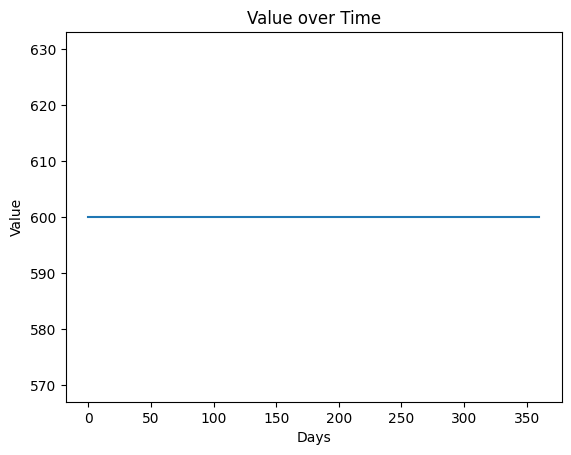

In [ ]:
# prompt: Haz un gráfico donde tengas un valor de 600 cada 60 días

import matplotlib.pyplot as plt
import numpy as np

# Generate a series of values that increase by 600 every 60 days
x = np.arange(0, 365, 60)
y = np.repeat(600, len(x))

# Create a line plot of the values
plt.plot(x, y)

# Set the x-axis label to "Days"
plt.xlabel("Days")

# Set the y-axis label to "Value"
plt.ylabel("Value")

# Set the title of the plot to "Value over Time"
plt.title("Value over Time")

# Display the plot
plt.show()


<Axes: >

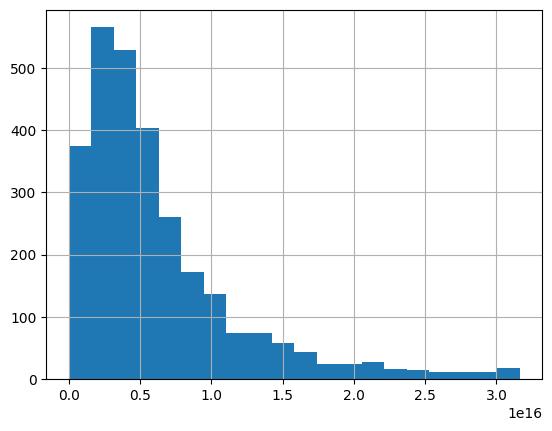

In [ ]:
# prompt: transforma la columna de intervalo de compra a numérico y genera un gráfico de distribución de los intervalos de tiempo entre compras

import pandas as pd
# Convert the 'AveragePurchaseInterval' column to numeric
df_customer_summary['AveragePurchaseInterval'] = pd.to_numeric(df_customer_summary['AveragePurchaseInterval'], errors='coerce')

# Plot a histogram of the purchase intervals
df_customer_summary['AveragePurchaseInterval'].hist(bins=20)


<Axes: >

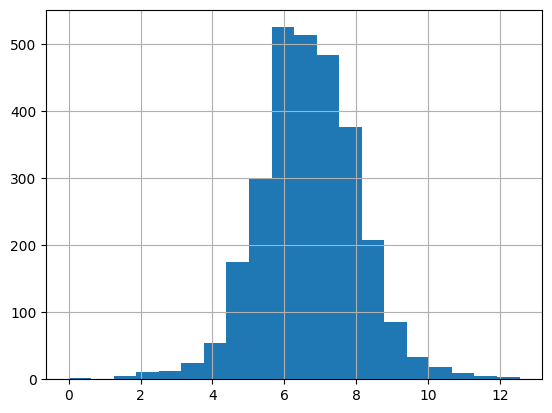

In [ ]:
# prompt: genera un gráfico de distribución con el monto de compra, transforma los datos con transformación logaritmica

import numpy as np
# Transform the 'TotalAmount' column using logarithmic transformation
df_customer_summary['LogTotalAmount'] = np.log(df_customer_summary['TotalAmount'])

# Create a histogram of the log-transformed purchase amounts
df_customer_summary['LogTotalAmount'].hist(bins=20)


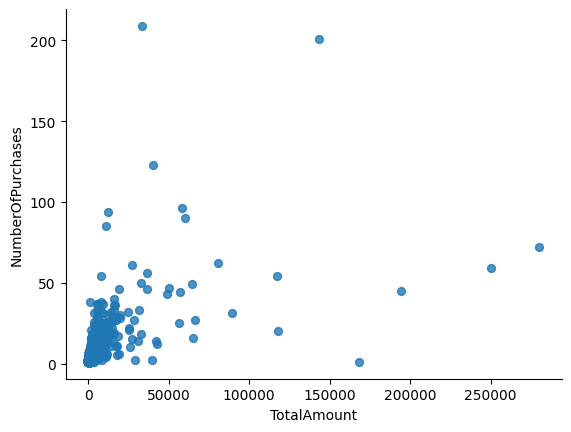

In [ ]:
# @title TotalAmount vs NumberOfPurchases

from matplotlib import pyplot as plt
df_customer_summary.plot(kind='scatter', x='TotalAmount', y='NumberOfPurchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)